### DSA 6000 Final Project : Predictive modeling for House Sales in King County 

#### Data Source : https://www.kaggle.com/harlfoxem/housesalesprediction/data

#### Import all the data manipulation and visualization libraries

In [174]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Load the data from the csv file

In [175]:
# Data Retrieval
data = pd.read_csv('kc_house_data.csv')

#### Let's a glimpse at the data types and no. of variables present in the dataset

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


#### The above output shows that there are 21613 rows and 18 non null columns in the dataset. So, missing values are not present. Let's take a quick look at the dataset.

In [177]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Conform for missing values again

In [48]:
# check missing values
def check_nan(list_values):
    return sum(list_values.isnull())

#Using apply function to check missing values on every column of dataframe
print data.apply(check_nan)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


#### From the above values it can be infered that no null values are present in the dataset.

#### Prepare the dataset by dropping irrelevant columns and performing the training testing split.

In [49]:
# Dropping id, date and zipcode columns
data = data.drop(['id','date','zipcode'],axis=1)

# Function to perform train test split on the dataset

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


train_set, test_set = split_train_test(data, 0.1)

# Removing one row with grade 1 for the purpose of calculation. 
train_set = train_set[train_set['grade']>1]

#### Saving the testing set to a cvs file below, because we don't want our model to get familiar with this part of the dataset. This testing set will loaded when the final predictions will be performed.

In [ ]:
# Saving the testing set 
test_set.to_csv('test_set.csv')

#### Summary statistics for the quantitative variables in the training dataset

In [180]:
train_set[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,1.945100e+04,19451.000000,19451.000000,19451.000000,1.945100e+04,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000
mean,5.405574e+05,3.372269,2.113850,2081.025037,1.505050e+04,1.493599,1788.223279,292.801758,1986.964269,12682.744692
std,3.695776e+05,0.936531,0.771775,921.445409,4.073643e+04,0.541276,829.890866,444.404428,685.793629,27062.270210
min,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,399.000000,660.000000
25%,3.220000e+05,3.000000,1.500000,1420.000000,5.043500e+03,1.000000,1190.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.615000e+03,1.500000,1560.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.065000e+04,2.000000,2210.000000,560.000000,2360.000000,10078.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,6210.000000,871200.000000


#### Exploratory Data Analysis

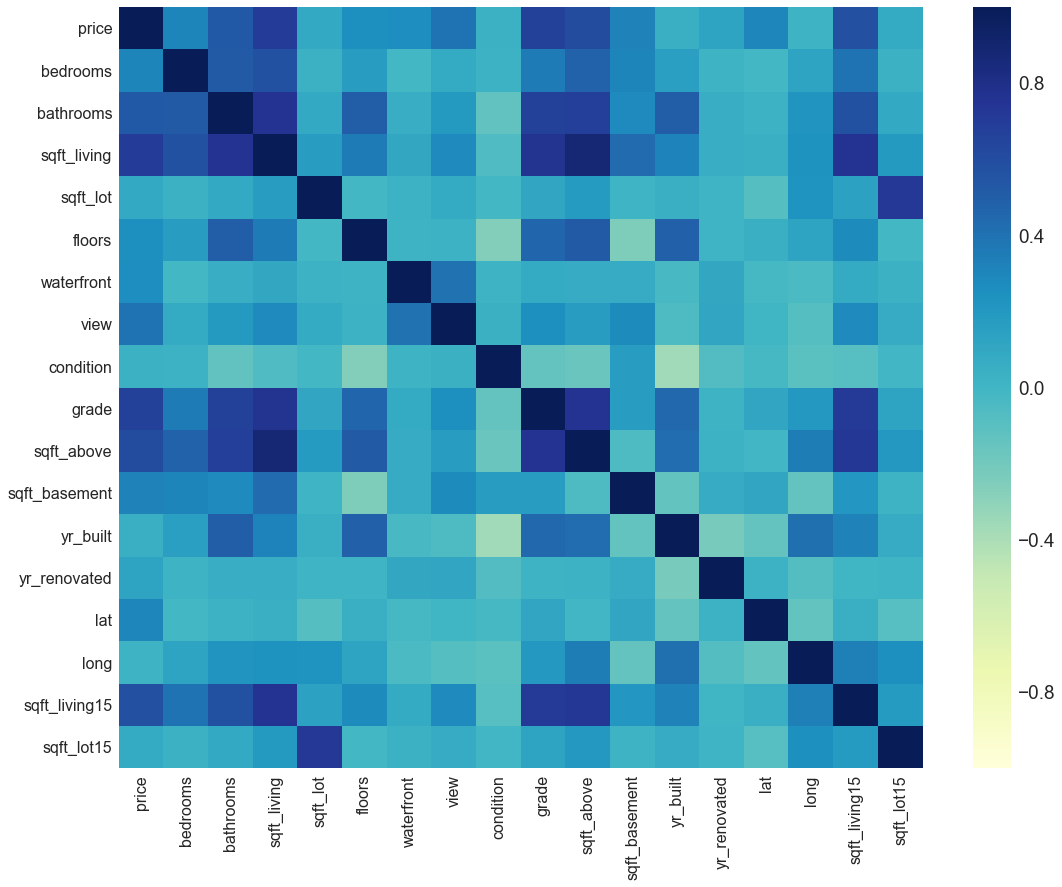

In [193]:
# Heatmap to show strength of relationship between variables
fig, ax = plt.subplots(figsize=(18,14))
sns.set(font_scale=1.9)
sns.heatmap(train_set.corr(),cmap="YlGnBu")
plt.savefig('heatmap.png')

#### From the above heatmap it can be observed that housing prices are highly correlated to sqft_living, sqft_living15, lat, grade, bathrooms variables

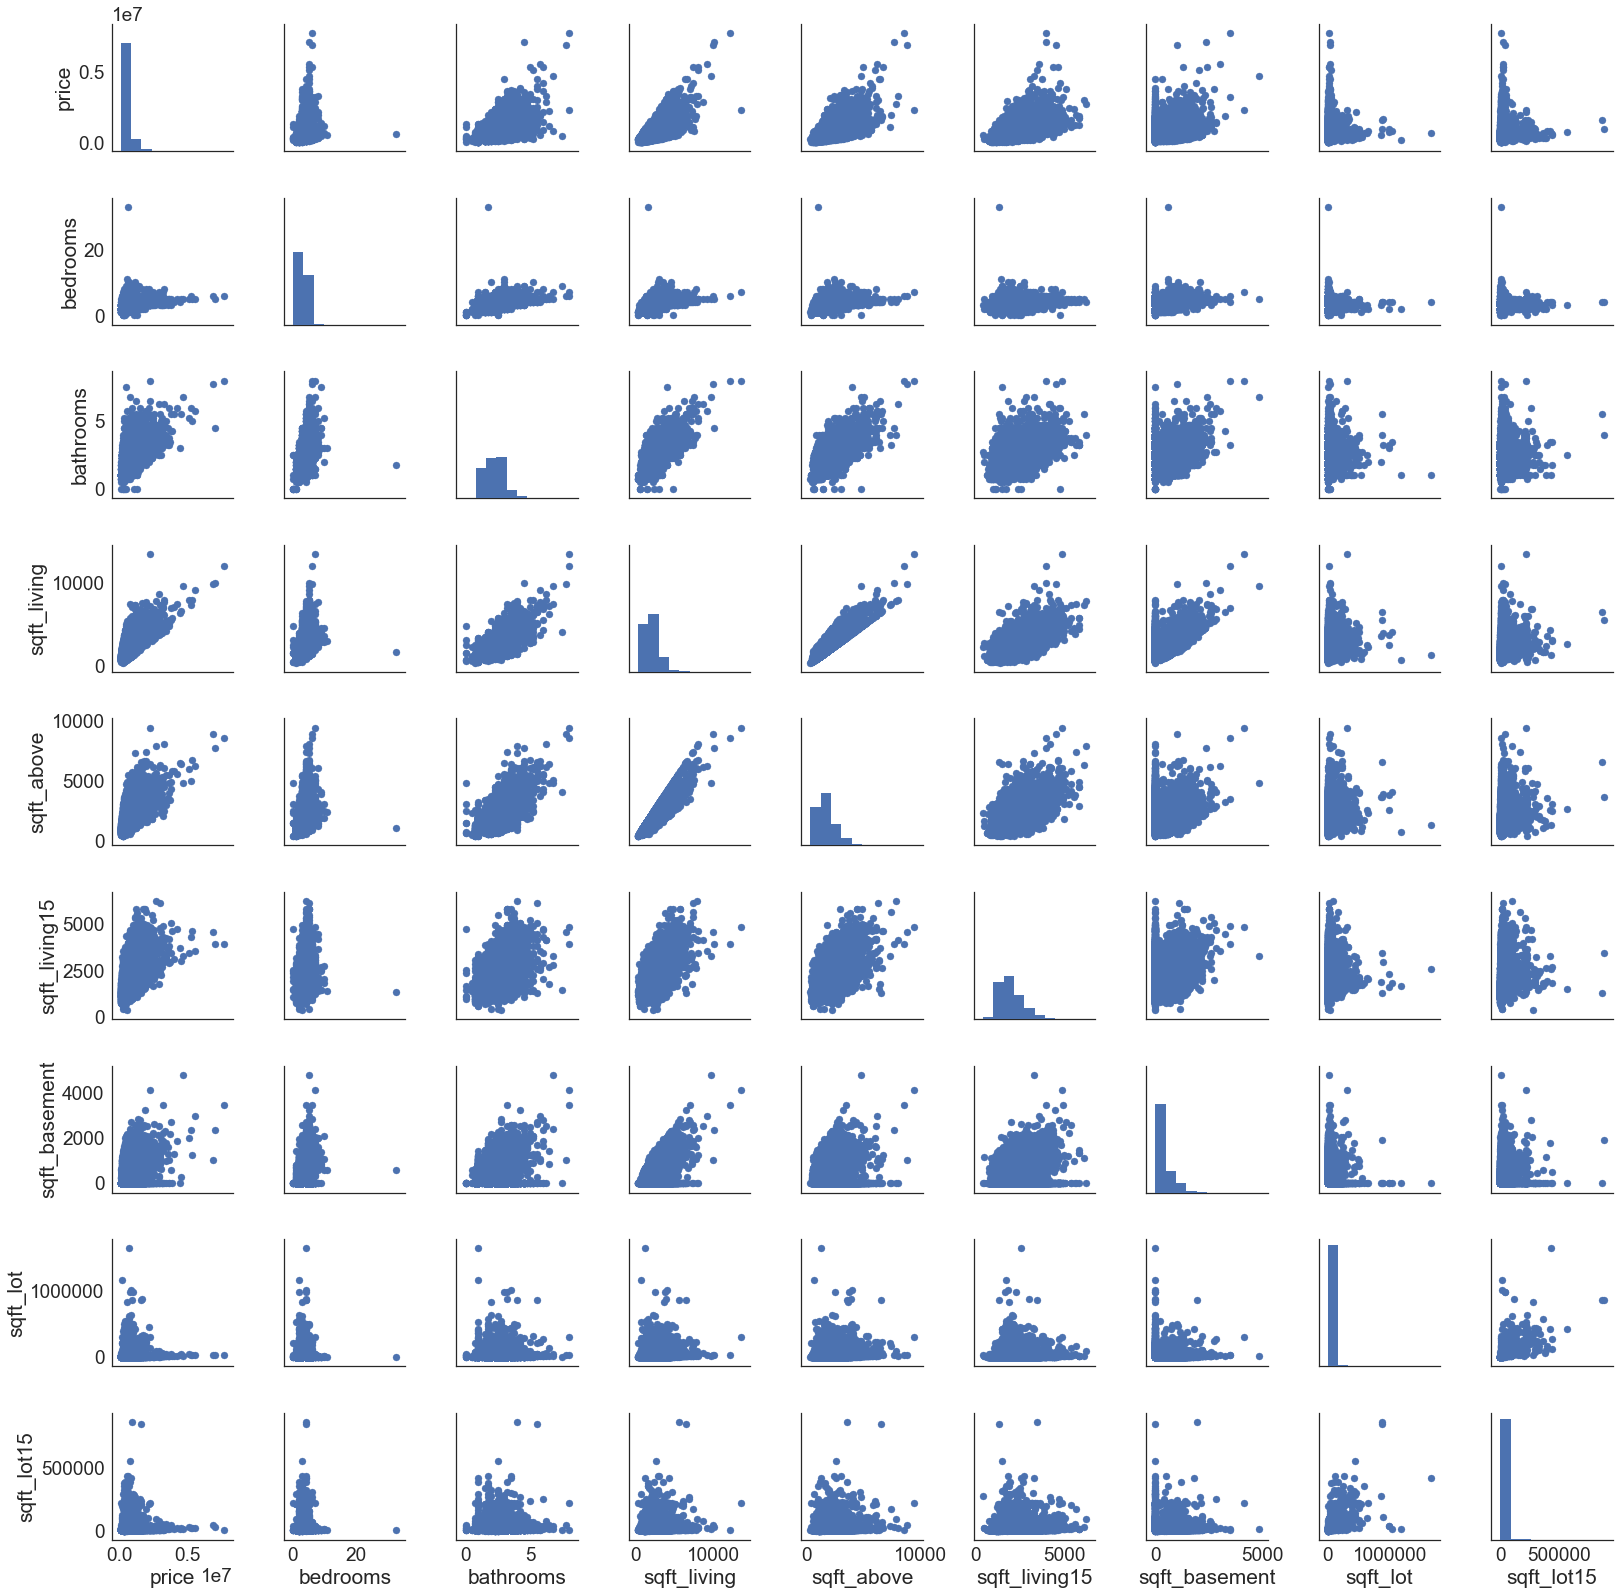

In [194]:
# Pair Plot to show strength of corelation between numeric variables.
sns.set_style("white")
g = sns.PairGrid(train_set[['price','bedrooms','bathrooms','sqft_living','sqft_above','sqft_living15',
                              'sqft_basement','sqft_lot','sqft_lot15']])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.savefig('pairplot.png')

#### Pair plot results confirm the observation in heatmap about the relationship between response variable price and the input variables i.e bedrooms, bathrooms, sqft_living, sqft_above, sqft_living15, sqft_basement, sqft_lot, sqft_lot15.

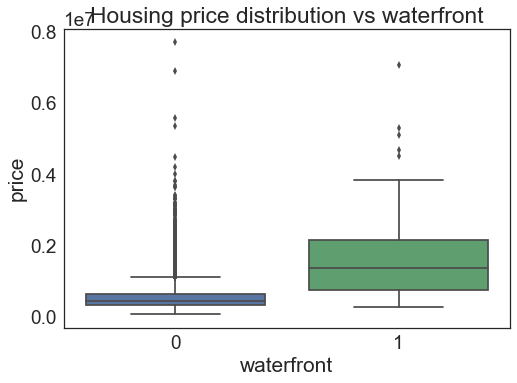

In [195]:
# Boxplot to show distribution of price across different levels of waterfront.
sns.boxplot(x='waterfront', y='price',data=train_set)
plt.title('Housing price distribution vs waterfront')
plt.savefig('waterfront.png')

#### From the above boxplot, it can be observed that houses with waterfront have higher median price.

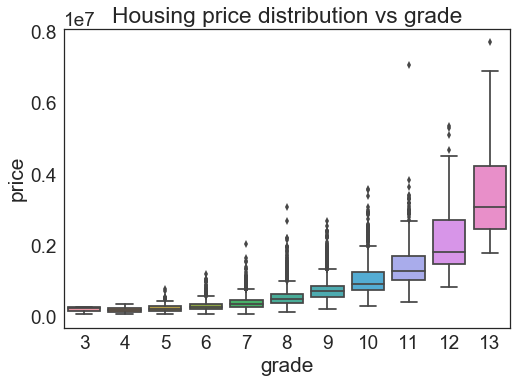

In [196]:
# Box plot to show distribution of pricing across different levels of grades
sns.boxplot(x='grade', y='price',data=train_set)
plt.title('Housing price distribution vs grade')
plt.savefig('grade.png')

#### This plot also depicts that higher the grader higher the median price of the house.

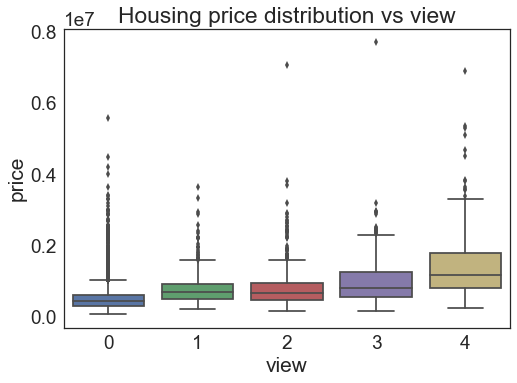

In [197]:
# Boxplot to show distribution of price across different levels of view
sns.boxplot(x='view', y='price',data=train_set)
plt.title('Housing price distribution vs view')
plt.savefig('view.png')

#### Houses that are viewed once, twice or thrice don't have any significant difference in their median housing price except for the presence of an outlier in the house that was viewed twice and thrice. Houses that were viewed 4 times have highest median price overall. 

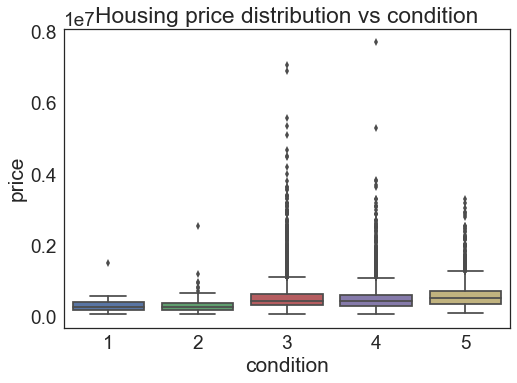

In [60]:
# Boxplots to show distribution of price across different levels of condition
sns.boxplot(x='condition', y='price',data=train_set)
plt.title('Housing price distribution vs condition')
plt.savefig('condition.png')

#### Obviously average(3), good(4), and very good(5) conditions have higher median price. 

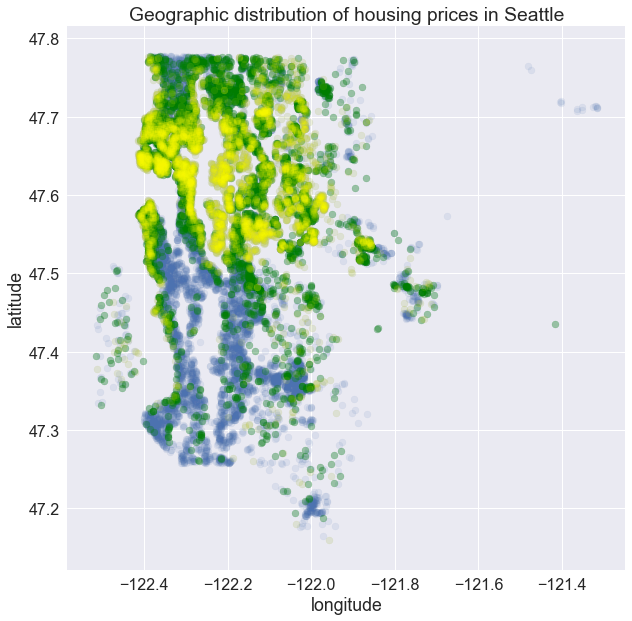

In [171]:
# Scatter plot to see distribution of prices between 2nd & 3rd quartile , and above 3rd quartile

median=train_set['price'].quantile(0.5)
thirdquantile=train_set['price'].quantile(0.75)


fig, ax = plt.subplots(figsize=(10,10)) 
plt.scatter(train_set['long'],train_set['lat'],alpha=.1)
plt.scatter(train_set[(train_set.price> median)&(train_set.price< thirdquantile)].long,train_set[(train_set.price> median)&(train_set.price<thirdquantile)].lat,alpha=0.3,color='green')
plt.scatter(train_set[train_set.price> thirdquantile].long,train_set[train_set.price> thirdquantile].lat,alpha=0.1,color='yellow')

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Geographic distribution of housing prices in Seattle')
plt.savefig('Geography.png')

#### Looks like houses in the northern suburbs are more expensive depicted by yellow scatter. Houses in south are mostly below the median housing price. Housing price between the 2nd and 3rd quartile are scattered throughout which is depicted in green.

#### Prepare the features and labels to feed into the pipeline for feature engineering.

In [71]:
# Input variables and Response variables assignment

X_train = train_set.drop('price',axis=1)
y_train = train_set['price']

#X_test = test_set.drop('price',axis=1)
#y_test = test_set['price']

#print "Length of training set : ", "features : ", len(X_train), " labels : ",len(y_train)
#print "Length of testing set : ", "features : ", len(X_test), " labels : ",len(y_test)

# Copy the train set to work on it and save it for future use
housing = X_train.copy()
housing_labels = y_train.copy()

#### Feature Engineering using custom transformers.

In [78]:
# Feature Engineering
# Custom transformer to add new features(basement and renovated) and create dummy variables for categorical columns

from sklearn.base import BaseEstimator, TransformerMixin
class CustomAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,sqft_basement,yr_renovated,cat_attribs):
        self.sqft_basement = sqft_basement
        self.yr_renovated = yr_renovated
        self.cat_attribs = cat_attribs
    def fit(self,X,y=None):
        return self   
    def transform(self,X,y=None):
        X['basement'] = X[self.sqft_basement].apply(lambda val: 1 if val > 0 else 0)
        X['renovated'] = X[self.yr_renovated].apply(lambda val: 1 if val > 0 else 0)
        for cols in self.cat_attribs:
            value = pd.get_dummies(X[cols])
            value = value.add_prefix("{}_".format(cols))
            X = X.join(value)
        return X

# Custom transformer to select relevant columns
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [79]:
# List of variables that will be used in the model

cats= ['waterfront_0','waterfront_1','view_0', 'view_1','view_2','view_3', 'view_4',
       'condition_1', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'basement_0', 'basement_1', 'renovated_0',
       'renovated_1','grade_3','grade_4','grade_5','grade_6','grade_7','grade_8','grade_9','grade_10','grade_11','grade_12','grade_13']

nums = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
     'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

attribs = nums+cats

#### Build the pipeline for data transformation and feature selection.

In [80]:
# Full pipeline for feature engineering 
from sklearn.pipeline import Pipeline

pipe = Pipeline ([
    ('AttributeAdder',CustomAttributesAdder('sqft_basement','yr_renovated',['waterfront','view','condition','basement','renovated','grade'])),
    ('selector', DataFrameSelector(attribs)),
])

#### Fit the pipeline to transform the training dataset which will be used for modeling

In [81]:
# Preping the training set to feed into the model
housing_prepared = pipe.fit_transform(housing)

#### Import the libraries for machine learning

In [82]:
# Importing Libraries for Machine Learning

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

#### Start with Linear models like Linear Regression and Ridge Regression

In [108]:
#Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
lin_housing_predictions=lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,lin_housing_predictions)
lin_rmse = np.sqrt(lin_mse)

print "RMSE for Linear Regression : ", lin_rmse

RMSE for Linear Regression :  192958.036871


In [109]:
# Ridge Regression with alpha variable 0.0
ridge_reg = Ridge(alpha=0.0)
ridge_reg.fit(housing_prepared,housing_labels)
ridge_reg_predictions = ridge_reg.predict(housing_prepared)
ridge_mse = mean_squared_error(housing_labels, ridge_reg_predictions)
ridge_rmse = np.sqrt(ridge_mse)

print "RMSE for Ridge Regression with alpha 0.0 : ", ridge_rmse

RMSE for Ridge Regression with alpha 0.0 :  192958.036871


In [110]:
# Ridge Regression with alpha variable 0.5
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(housing_prepared,housing_labels)
ridge_reg_predictions = ridge_reg.predict(housing_prepared)
ridge_mse = mean_squared_error(housing_labels, ridge_reg_predictions)
ridge_rmse = np.sqrt(ridge_mse)

print "RMSE for Ridge Regression with alpha 0.5 : ", ridge_rmse

RMSE for Ridge Regression with alpha 0.5 :  193231.363484


#### The Root Mean Square Error in Linear and Ridge Regression are almost same. Increasing the alpha value in Ridge Regression did not help very much. Moving forward tree based models will be fitted.

In [111]:
# Decision Tree Regression
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)
tree_housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,tree_housing_predictions)
tree_rmse = np.sqrt(tree_mse)

print "RMSE for Decision Tree : ", tree_rmse

RMSE for Decision Tree :  10473.4112588


In [112]:
# Random Forest Regression
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
forest_reg_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels,forest_reg_predictions)
forest_rmse = np.sqrt(forest_mse)

print "RMSE for Random Forest : ", forest_rmse

RMSE for Random Forest :  59276.2241344


In [207]:
#Extra Trees Regression
extra_reg = ExtraTreesRegressor()
extra_reg.fit(housing_prepared,housing_labels)
extra_reg_predictions = extra_reg.predict(housing_prepared)
extra_mse = mean_squared_error(housing_labels, extra_reg_predictions)
extra_rmse = np.sqrt(extra_mse)

print "RMSE for Extra Trees : ", extra_rmse

RMSE for Extra Trees :  10473.4112588


#### The above results show that Extra Trees has the lowest RMSE. But they are training RMSE. Real performance of the model should be evaluated from unseen data. So, let's use 5 fold cross validation to check model performance.

In [114]:
# 5 Fold cross validation on all the models

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error",cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)

tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring ="neg_mean_squared_error",cv=5)
tree_rmse_scores = np.sqrt(-tree_scores)

forest_scores = cross_val_score(forest_reg, housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)

extra_scores = cross_val_score(extra_reg, housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=5)
extra_rmse_scores = np.sqrt(-extra_scores)

In [115]:
def display_scores(scores):
    print "scores : ", scores
    print "min error :", scores.min()
    print "max error :", scores.max()
    print "mean error : ", scores.mean()
    print "standard deviation in error : ", scores.std()

In [116]:
print "Results for Linear Regression model :"

display_scores(lin_rmse_scores)

print "\nResults for Decision Tree model :"

display_scores(tree_rmse_scores)

print "\nResults for Random Forests model :"

display_scores(forest_rmse_scores)

print "\nResults for Extra Trees model :"

display_scores(extra_rmse_scores)

Results for Linear Regression model :
scores :  [ 195291.86989067  172945.13164624  187694.8859288   220800.04731226
  192189.39448793]
min error : 172945.131646
max error : 220800.047312
mean error :  193784.265853
standard deviation in error :  15530.7372318

Results for Decision Tree model :
scores :  [ 207084.20473941  164564.56208662  191638.26590036  218976.19241985
  187041.36484715]
min error : 164564.562087
max error : 218976.19242
mean error :  193860.917999
standard deviation in error :  18522.177403

Results for Random Forests model :
scores :  [ 149508.79453506  124974.57854582  135865.6969865   157360.49987134
  140250.81202959]
min error : 124974.578546
max error : 157360.499871
mean error :  141592.076394
standard deviation in error :  11153.9163618

Results for Extra Trees model :
scores :  [ 142154.3126363   121787.16600915  135430.43551845  166319.70132689
  135159.81932767]
min error : 121787.166009
max error : 166319.701327
mean error :  140170.286964
standard devi

#### From the above results, it can be observed that Extra Trees has the lowest mean RMSE.Random Forest comes the second lowest. Our  approach would be is to try to tune both the models and see which one performs better.

#### Tuning the Random Forest Model

In [123]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features':[2,4,6,8,10]},
    ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=10,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [124]:
print "Best combination of parameters of Random Forests:", grid_search.best_params_

print "Best Estimator :", grid_search.best_estimator_

Best combination of parameters of Random Forests: {'max_features': 10, 'n_estimators': 30}
Best Estimator : RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [125]:
# Evaluation scores
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print (np.sqrt(-mean_score), params)

(202030.01980180471, {'max_features': 2, 'n_estimators': 3})
(175371.11734208351, {'max_features': 2, 'n_estimators': 10})
(163980.97861551319, {'max_features': 2, 'n_estimators': 30})
(187079.69910502189, {'max_features': 4, 'n_estimators': 3})
(159193.26813134394, {'max_features': 4, 'n_estimators': 10})
(150550.43441815797, {'max_features': 4, 'n_estimators': 30})
(178631.13426626957, {'max_features': 6, 'n_estimators': 3})
(152244.14304559596, {'max_features': 6, 'n_estimators': 10})
(142236.60751186658, {'max_features': 6, 'n_estimators': 30})
(172582.38150926633, {'max_features': 8, 'n_estimators': 3})
(149560.94723122055, {'max_features': 8, 'n_estimators': 10})
(141840.52697321872, {'max_features': 8, 'n_estimators': 30})
(173165.01416979596, {'max_features': 10, 'n_estimators': 3})
(142437.64240321217, {'max_features': 10, 'n_estimators': 10})
(137822.00111983335, {'max_features': 10, 'n_estimators': 30})


#### Looks like using max_features of 10 and n_estimators of 30 gives the lowest mean RMSE of 137822.0011. But these parameters are on the right boundary. So, let's shift the parameters to the right i.e increase them and check more.

In [126]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [40,50,80], 'max_features':[8,10,15,20]},
    ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=10,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [40, 50, 80], 'max_features': [8, 10, 15, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [127]:
print "Best combination of parameters of Random Forests:", grid_search.best_params_

print "Best Estimator :", grid_search.best_estimator_

Best combination of parameters of Random Forests: {'max_features': 20, 'n_estimators': 80}
Best Estimator : RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=20, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [128]:
# Evaluation scores
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print (np.sqrt(-mean_score), params)

(140344.91114902278, {'max_features': 8, 'n_estimators': 40})
(138629.26238299144, {'max_features': 8, 'n_estimators': 50})
(139105.18578985072, {'max_features': 8, 'n_estimators': 80})
(137193.22989568711, {'max_features': 10, 'n_estimators': 40})
(137812.43727108245, {'max_features': 10, 'n_estimators': 50})
(136176.70559608573, {'max_features': 10, 'n_estimators': 80})
(134935.66647784939, {'max_features': 15, 'n_estimators': 40})
(133105.66952128161, {'max_features': 15, 'n_estimators': 50})
(132536.75014722478, {'max_features': 15, 'n_estimators': 80})
(133748.55131095808, {'max_features': 20, 'n_estimators': 40})
(133141.81475764225, {'max_features': 20, 'n_estimators': 50})
(132157.24068617958, {'max_features': 20, 'n_estimators': 80})


#### Again the parameters on the right boundary are giving the best results. i.e max_features 20 and n_estimators 80 give mean RMSE 132157.24068. Let's check once more by shifting the values to the right.

In [129]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [100,120,140], 'max_features':[22,27,32]},
    ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=10,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [100, 120, 140], 'max_features': [22, 27, 32]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [130]:
print "Best combination of parameters of Random Forests:", grid_search.best_params_

print "Best Estimator :", grid_search.best_estimator_

Best combination of parameters of Random Forests: {'max_features': 32, 'n_estimators': 100}
Best Estimator : RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=32, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [131]:
# Evaluation scores
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print (np.sqrt(-mean_score), params)

(131240.50056762382, {'max_features': 22, 'n_estimators': 100})
(131076.00345937509, {'max_features': 22, 'n_estimators': 120})
(130932.21313445721, {'max_features': 22, 'n_estimators': 140})
(131015.49930038402, {'max_features': 27, 'n_estimators': 100})
(130947.29665942115, {'max_features': 27, 'n_estimators': 120})
(130798.80858187318, {'max_features': 27, 'n_estimators': 140})
(130647.43091279374, {'max_features': 32, 'n_estimators': 100})
(130742.12225212689, {'max_features': 32, 'n_estimators': 120})
(130809.51579512414, {'max_features': 32, 'n_estimators': 140})


#### This time 100 estimators and 32 features gave the lowest mean RMSE of 130647.4309. Let's check by shifting the boundary again i.e  decreasing the estimators and increasing the features.

In [132]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [80,90,100], 'max_features':[33,37,40]},
    ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=10,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [80, 90, 100], 'max_features': [33, 37, 40]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [133]:
print "Best combination of parameters of Random Forests:", grid_search.best_params_

print "Best Estimator :", grid_search.best_estimator_

Best combination of parameters of Random Forests: {'max_features': 33, 'n_estimators': 100}
Best Estimator : RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=33, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [134]:
# Evaluation scores
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print (np.sqrt(-mean_score), params)

(130670.53724788892, {'max_features': 33, 'n_estimators': 80})
(130880.80553900298, {'max_features': 33, 'n_estimators': 90})
(130281.72674392693, {'max_features': 33, 'n_estimators': 100})
(131857.89296712779, {'max_features': 37, 'n_estimators': 80})
(131425.40487406711, {'max_features': 37, 'n_estimators': 90})
(131721.52964528705, {'max_features': 37, 'n_estimators': 100})
(132645.18851416837, {'max_features': 40, 'n_estimators': 80})
(132404.56394631485, {'max_features': 40, 'n_estimators': 90})
(132742.1115652064, {'max_features': 40, 'n_estimators': 100})


#### So, the lowest mean RMSE of 130281.7267 can be achieved with 33 max_features and 100 n_estimators with Random Forest Model. Let's tune the Extra trees model as well.

#### Tuning the Extra Trees Model

In [120]:
paramgrid = [
    {'n_estimators': [3, 10, 30], 'max_features':[2,4,6,8,10]},
    ]

extra_reg = ExtraTreesRegressor()
grid = GridSearchCV(extra_reg,paramgrid,cv=10,scoring='neg_mean_squared_error')
grid.fit(housing_prepared,housing_labels)

GridSearchCV(cv=10, error_score='raise',
       estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [121]:
print "Best combination of parameters of Extra Trees:", grid.best_params_

print "Best Estimator :", grid.best_estimator_

Best combination of parameters of Extra Forests: {'max_features': 10, 'n_estimators': 30}
Best Estimator : ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features=10, max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)


In [122]:
# Evaluation scores
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print (np.sqrt(-mean_score), params)

(196382.40250642362, {'max_features': 2, 'n_estimators': 3})
(175190.79414736212, {'max_features': 2, 'n_estimators': 10})
(168337.48642791156, {'max_features': 2, 'n_estimators': 30})
(198240.23039088916, {'max_features': 4, 'n_estimators': 3})
(170085.84852225069, {'max_features': 4, 'n_estimators': 10})
(161626.46823313198, {'max_features': 4, 'n_estimators': 30})
(186861.7872916098, {'max_features': 6, 'n_estimators': 3})
(167711.49908382801, {'max_features': 6, 'n_estimators': 10})
(155915.58426822384, {'max_features': 6, 'n_estimators': 30})
(181082.86536450969, {'max_features': 8, 'n_estimators': 3})
(163107.80128233589, {'max_features': 8, 'n_estimators': 10})
(155690.23794977413, {'max_features': 8, 'n_estimators': 30})
(183160.43029140061, {'max_features': 10, 'n_estimators': 3})
(159701.27103329753, {'max_features': 10, 'n_estimators': 10})
(151163.99545709876, {'max_features': 10, 'n_estimators': 30})


#### 10 max_features and 30 n_estimators give the lowest mean RMSE with Extra Trees Model. Let's tune it further.

In [190]:
from sklearn.model_selection import GridSearchCV

paramgrid = [
    {'n_estimators': [100,120,140], 'max_features':[22,27,32]},
    ]


extra_reg = ExtraTreesRegressor()
grid = GridSearchCV(extra_reg,paramgrid,cv=10,scoring='neg_mean_squared_error')
grid.fit(housing_prepared,housing_labels)

GridSearchCV(cv=10, error_score='raise',
       estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [100, 120, 140], 'max_features': [22, 27, 32]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [191]:
print "Best combination of parameters of  Extra Trees:", grid.best_params_

print "Best Estimator :", grid.best_estimator_

Best combination of parameters of  Extra Trees: {'max_features': 32, 'n_estimators': 140}
Best Estimator : ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features=32, max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=140, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)


In [192]:
# Evaluation scores
results = grid.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print (np.sqrt(-mean_score), params)

(139334.74960252404, {'max_features': 22, 'n_estimators': 100})
(138822.98900569836, {'max_features': 22, 'n_estimators': 120})
(138186.98422317789, {'max_features': 22, 'n_estimators': 140})
(135303.26634124847, {'max_features': 27, 'n_estimators': 100})
(136833.5147592962, {'max_features': 27, 'n_estimators': 120})
(136447.41556297304, {'max_features': 27, 'n_estimators': 140})
(135069.09873385684, {'max_features': 32, 'n_estimators': 100})
(134887.89996076541, {'max_features': 32, 'n_estimators': 120})
(134801.92284289541, {'max_features': 32, 'n_estimators': 140})


#### 32 max_features and 140 n_estimators in Extra Trees gave the lowest mean RMSE of 136447.781. Tuning it further.

In [186]:
paramgrid = [
    {'n_estimators': [80,90,100,120], 'max_features':[33,37,40]},
    ]


extra_reg = ExtraTreesRegressor()
grid = GridSearchCV(extra_reg,paramgrid,cv=10,scoring='neg_mean_squared_error')
grid.fit(housing_prepared,housing_labels)

GridSearchCV(cv=10, error_score='raise',
       estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [80, 90, 100, 120], 'max_features': [33, 37, 40]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [187]:
print "Best combination of parameters of Extra Trees:", grid.best_params_

print "Best Estimator :", grid.best_estimator_

Best combination of parameters of Extra Trees: {'max_features': 40, 'n_estimators': 80}
Best Estimator : ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features=40, max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)


In [188]:
results = grid.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print (np.sqrt(-mean_score), params)

(134989.1314446496, {'max_features': 33, 'n_estimators': 80})
(134630.34425745613, {'max_features': 33, 'n_estimators': 90})
(134764.03567171522, {'max_features': 33, 'n_estimators': 100})
(134240.6543973792, {'max_features': 33, 'n_estimators': 120})
(133903.01957578666, {'max_features': 37, 'n_estimators': 80})
(133351.75459514855, {'max_features': 37, 'n_estimators': 90})
(133821.37981723194, {'max_features': 37, 'n_estimators': 100})
(133760.8276122337, {'max_features': 37, 'n_estimators': 120})
(132094.24169528091, {'max_features': 40, 'n_estimators': 80})
(133487.38071862335, {'max_features': 40, 'n_estimators': 90})
(132108.19493414124, {'max_features': 40, 'n_estimators': 100})
(132428.55926617348, {'max_features': 40, 'n_estimators': 120})


#### Further tuning gave 40 max_features and 80 n_estimators to give 132094.241 RMSE.

#### Hence, from the above results we can say that Random Forest Regressor with max_features of 33 and n_estimators of 100 gave the lowest mean RMSE overall i.e 130281.7267. So, let's use this model to calculate features importance and perform final prediction on the test set.



#### We started with RandomForest with mean RMSE of 141592.076 and we tuned the model to achieve mean RMSE of 130281.7267. So, there was 7.98% improvement in the model performance.


In [206]:
(141592.076-130281.7267)/141592.076

0.07987981827457634

In [135]:
feature_importance = grid_search.best_estimator_.feature_importances_
print feature_importance

[  3.20530827e-03   1.57673470e-02   4.68531191e-01   1.57404995e-02
   2.27111934e-03   3.95395460e-02   5.61566539e-03   1.47654674e-02
   1.87151680e-03   1.81643749e-01   7.66094516e-02   7.86564171e-02
   1.54438352e-02   1.50321682e-02   1.49251103e-02   7.90186608e-03
   4.40179634e-04   8.27783665e-04   1.03729300e-03   6.55625283e-03
   8.95006514e-05   2.36674961e-04   1.36729119e-03   9.74420077e-04
   1.09741549e-03   4.31408363e-04   4.52206244e-04   5.39633961e-04
   4.57276743e-04   3.82459327e-07   8.46804661e-06   5.82201589e-05
   6.41967657e-04   5.45042285e-03   4.19293740e-03   3.34154689e-03
   4.06564682e-03   3.48182905e-03   5.32052734e-03   1.41045622e-03]


In [136]:
temp=pd.DataFrame(sorted(zip(feature_importance, attribs), reverse=True))

In [138]:
temp.columns =['importance','feature']

In [199]:
temp

,importance,feature
0,4.685312e-01,sqft_living
1,1.816437e-01,lat
2,7.865642e-02,sqft_living15
3,7.660945e-02,long
4,3.953955e-02,sqft_above
5,1.576735e-02,bathrooms
6,1.574050e-02,sqft_lot
7,1.544384e-02,sqft_lot15
8,1.503217e-02,waterfront_0
9,1.492511e-02,waterfront_1


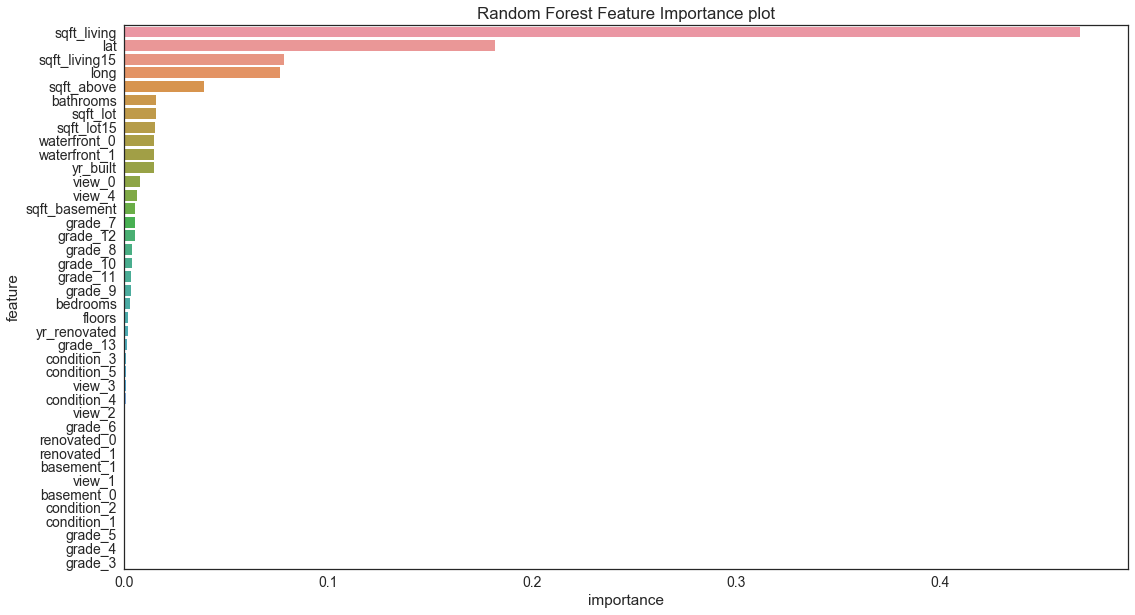

In [203]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(18,10))
sns.set(font_scale=1.4)
sns.barplot(x='importance',y='feature',data=temp)
plt.xlabel('importance')
plt.title("Random Forest Feature Importance plot")
plt.savefig('featureimportance.png')

#### From the above features importance plot, it can be observed that sqft_living, lat, sqft_living15, long, sqft_above are some of the most important predictors that are contributing majorly in lowering the RSME.

#### Loading the testing data to perform the final predictions

In [165]:
# Read the test set
test_set = pd.read_csv('test_set.copy.csv')
X_test = test_set.drop('price',axis=1)
y_test = test_set['price']

In [166]:
# Using the Random Forest model with 33 max_features and 100 n_estimators as the final model.
final_model = grid_search.best_estimator_
X_test_prepared = pipe.transform(X_test)

In [169]:
# Perform the final prediction
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [170]:
print "RMSE on test set : ", final_rmse

RMSE on test set :  117293.423668


#### So, the testing set RMSE with the final model is 117293.42